# List of Stocks

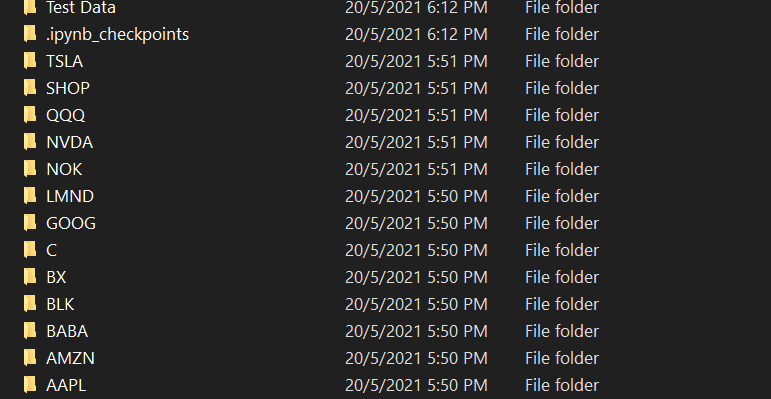

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/drive',force_remount=True)
root_path = 'gdrive/My Drive/2021 Capstone/Selected Tickers/' 


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir = "/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX" # remember to change this to the ticker you want
path = f'{dir}/*.csv'
name = 'BX_Train' # change this as well

import glob
files = glob.glob(path)
for f in files:
  print(f)


/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2015.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2021.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2017.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2020.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2012.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2019.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2018.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2007.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2008.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2013.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2009.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2014.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2011.csv
/content/gdrive/MyDrive/2021 Capstone/Selected Tickers/BX/BX_2010.csv
/content/gdrive/MyDr

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
for yr in files:
  df = pd.concat([pd.read_csv(yr, parse_dates=['time'], index_col=1), df])
df.sort_index(inplace=True)
df.drop(['symbol'], axis=1, inplace=True)

df.head()

,askclose,askhigh,asklow,askopen,asksize,bidclose,bidhigh,bidlow,bidopen,bidsize,close,high,low,open,volume
time,,,,,,,,,,,,,,,
2007-06-22 09:33:00,86058.995697,86058.995697,86058.995697,86058.995697,100.0,18.502685,19.363275,13.778046,18.502685,200.0,19.363275,19.363275,19.363275,19.363275,2000.0
2007-06-22 09:34:00,86058.995697,86058.995697,19.363275,86058.995697,100.0,17.642095,18.502685,13.790955,18.502685,100.0,19.363275,19.363275,19.363275,19.363275,3000.0
2007-06-22 09:35:00,17.211800,86058.995697,17.203194,86058.995697,400.0,15.959642,17.642095,13.778046,17.642095,100.0,17.211800,17.642095,17.211800,17.642095,300.0
2007-06-22 09:36:00,17.211800,17.211800,17.211800,17.211800,300.0,15.959642,16.351210,15.959642,15.959642,100.0,17.211800,17.642095,17.211800,17.642095,0.0
2007-06-22 09:37:00,17.211800,17.211800,17.211800,17.211800,300.0,15.959642,16.351210,15.959642,15.959642,100.0,17.211800,17.642095,17.211800,17.642095,0.0


In [ ]:
df = df[["close", "high", "low", "open", "volume"]]
df.head()

,close,high,low,open,volume
time,,,,,
2007-06-22 09:33:00,19.363275,19.363275,19.363275,19.363275,2000.0
2007-06-22 09:34:00,19.363275,19.363275,19.363275,19.363275,3000.0
2007-06-22 09:35:00,17.211800,17.642095,17.211800,17.642095,300.0
2007-06-22 09:36:00,17.211800,17.642095,17.211800,17.642095,0.0
2007-06-22 09:37:00,17.211800,17.642095,17.211800,17.642095,0.0


In [ ]:
## Verify Data has loaded 
print(f"No. of data points: {len(df)}")
print(f"Start of raw data: {df.index[0]}")
print(f"End of raw data: {df.index[-1]}")


No. of data points: 1335058
Start of raw data: 2007-06-22 09:33:00
End of raw data: 2021-02-17 16:00:00


# Data Preprocessing 

In [ ]:
start = '2017-03'
end = '2021-03'

df = df.loc[start:end].copy()

print("After filtering:")
print(f"No. of data points: {len(df)}")
print(f"Start of raw data: {df.index[0]}")
print(f"End of raw data: {df.index[-1]}")

After filtering:
No. of data points: 387810
Start of raw data: 2017-03-01 09:31:00
End of raw data: 2021-02-17 16:00:00


In [ ]:
df['prev_high'] = df['high'].shift(1)
df['fod_high'] = df['high'] - df['high'].shift(1)
df['spread'] = (df['high'] - df['low'])
df['return'] = df['close'] / df['open'] - 1
df.drop(['close', 'low', 'open'], axis=1, inplace=True)
# Because of first-order difference, we have to discard the very first entry.
df = df.iloc[1:].copy()

In [ ]:
def dfplot(input_df, size=(20,10)):
  # plot each column
  plt.figure(figsize=size)
  for cnt, feature in enumerate(input_df.columns):
    plt.subplot(len(input_df.columns), 1, cnt+1)
    plt.plot(input_df[feature])
    plt.title(feature, y=0.5, loc='right')
  plt.show()

In [ ]:
df.head()

,high,volume,prev_high,fod_high,spread,return
time,,,,,,
2017-03-01 09:32:00,23.628818,8941.0,23.644528,-0.015711,0.031421,0.000000
2017-03-01 09:33:00,23.597396,24572.0,23.628818,-0.031421,0.047132,0.001000
2017-03-01 09:34:00,23.597396,41230.0,23.597396,0.000000,0.047132,-0.001665
2017-03-01 09:35:00,23.589541,20162.0,23.597396,-0.007855,0.054987,0.000667
2017-03-01 09:36:00,23.581686,8427.0,23.589541,-0.007855,0.062843,0.002337


In [ ]:
df.tail()

,high,volume,prev_high,fod_high,spread,return
time,,,,,,
2021-02-17 15:56:00,69.860,10942.0,69.830,0.030,0.060,0.000716
2021-02-17 15:57:00,69.925,19866.0,69.860,0.065,0.050,0.000429
2021-02-17 15:58:00,69.950,15086.0,69.925,0.025,0.045,0.000413
2021-02-17 15:59:00,69.940,21382.0,69.950,-0.010,0.070,-0.000858
2021-02-17 16:00:00,69.900,110204.0,69.940,-0.040,0.050,-0.000143


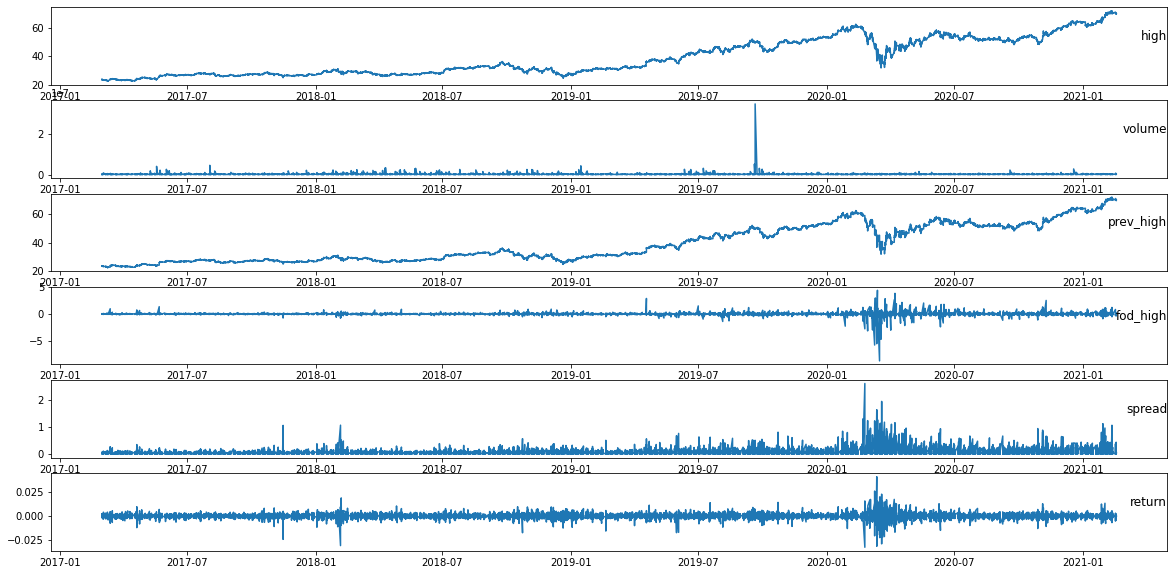

In [ ]:
# plot each column
dfplot(df)

# Data Reordering 

In [ ]:
# reorder columns
col_names = ['fod_high', 'volume', 'spread', 'return']
df1 = df[col_names]

# feat_names = col_names[1:]
# tgt_name = col_names[0]

In [ ]:
# Print the first few rows
df1.head()

,fod_high,volume,spread,return
time,,,,
2017-03-01 09:32:00,-0.015711,8941.0,0.031421,0.000000
2017-03-01 09:33:00,-0.031421,24572.0,0.047132,0.001000
2017-03-01 09:34:00,0.000000,41230.0,0.047132,-0.001665
2017-03-01 09:35:00,-0.007855,20162.0,0.054987,0.000667
2017-03-01 09:36:00,-0.007855,8427.0,0.062843,0.002337


In [ ]:
# Print the last few rows
df1.tail()

,fod_high,volume,spread,return
time,,,,
2021-02-17 15:56:00,0.030,10942.0,0.060,0.000716
2021-02-17 15:57:00,0.065,19866.0,0.050,0.000429
2021-02-17 15:58:00,0.025,15086.0,0.045,0.000413
2021-02-17 15:59:00,-0.010,21382.0,0.070,-0.000858
2021-02-17 16:00:00,-0.040,110204.0,0.050,-0.000143


In [ ]:
# We will use df instead of df1 since we only need the "high" and "volume" data

ticker = df
ticker.head() # create a copy|


,high,volume,prev_high,fod_high,spread,return
time,,,,,,
2017-03-01 09:32:00,23.628818,8941.0,23.644528,-0.015711,0.031421,0.000000
2017-03-01 09:33:00,23.597396,24572.0,23.628818,-0.031421,0.047132,0.001000
2017-03-01 09:34:00,23.597396,41230.0,23.597396,0.000000,0.047132,-0.001665
2017-03-01 09:35:00,23.589541,20162.0,23.597396,-0.007855,0.054987,0.000667
2017-03-01 09:36:00,23.581686,8427.0,23.589541,-0.007855,0.062843,0.002337


In [ ]:
ticker.drop(['prev_high', 'fod_high', 'spread', 'return'], axis=1, inplace=True)

In [ ]:
# Double check on data
ticker.head()

,high,volume
time,,
2017-03-01 09:32:00,23.628818,8941.0
2017-03-01 09:33:00,23.597396,24572.0
2017-03-01 09:34:00,23.597396,41230.0
2017-03-01 09:35:00,23.589541,20162.0
2017-03-01 09:36:00,23.581686,8427.0


In [ ]:
# Save Ticker File as CSV and TXT
from google.colab import files
ticker.to_csv(f"{name}.txt", sep='\t', index=False) # TXT
ticker.to_csv(f"{name}.csv", index=False) # CSV

files.download(f"{name}.csv")
files.download(f"{name}.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print total number of samples to split later
print(f"No. of data points in {name} dataset: {len(ticker)}")

No. of data points in BX dataset: 387809


In [ ]:
ticker.tail()

,high,volume
time,,
2021-02-17 15:56:00,69.860,10942.0
2021-02-17 15:57:00,69.925,19866.0
2021-02-17 15:58:00,69.950,15086.0
2021-02-17 15:59:00,69.940,21382.0
2021-02-17 16:00:00,69.900,110204.0
